In [1]:
#Simple Logistic Regression

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(['#FF0000','#0000FF'])
cmap_light= ListedColormap(['#FFBBBB','#BBBBFF'])

In [4]:
def sigmoid(h):
    return 1/(1+np.exp(-h))
def cross_entropy(y,p_hat):
    return -(1/len(y))*np.sum(y*np.log(p_hat)+(1-y)*np.log(1-p_hat))
def accuracy(y,y_hat):
    return np.mean(y==y_hat)


In [5]:
class logisticRegression():
    def __init__(self,thresh=0.5):
        self.W = None
        self.b = None
        self.thresh = thresh
        
    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=True):
        epochs = int(epochs)
        N,D = X.shape

        #Randomization of weights and biases
        self.W = np.random.randn(D)
        self.b = np.random.randn(1)

        #Build Container For Losses
        J = np.zeros(epochs)

        #SGD Predicition
        for epoch in range(epochs):
            p_hat = self.__forward__(X)
            J[epoch] = cross_entropy(y, p_hat)
            #Weights and Bias Update Rools
            self.W -= eta*(1/N)*X.T@(p_hat-y)
            self.b -= eta* (1/N)*np.sum(p_hat-y)
        
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel("$\mathcal{J}$")
            plt.title("Training Curve")

    def __forward__(self, X):
            return sigmoid(X@self.W+self.b)
        
    def predict(self,X):
            return (self.__forward__(X)>=self.thresh).astype(np.int32)

<>:30: SyntaxWarning: invalid escape sequence '\m'
<>:30: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Rami Alrwais\AppData\Local\Temp\ipykernel_37348\3374361274.py:30: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{J}$")


In [6]:
def main():
    N = 1000
    D = 2

    X0 = np.random.randn((N//2),D) + np.array([1, 1])
    X1 = np.random.randn((N//2),D) + np.array([-1, -1.5])
    X = np.vstack((X0, X1))

    y = np.array([0]*(N//2) + [1]*(N//2))

    plt.figure()
    plt.scatter(X[:,0], X[:,1], c = y, alpha = 0.5)
    plt.show()
    log_reg = logisticRegression()
    log_reg.fit(X,y,eta=1e-3,epochs=3e4)
    y_hat = log_reg.predict(X)

    print(f'Training Accuracy"{accuracy(y,y_hat):0.4f}')

         #Visualize Desision Boundary
    x1 = np.linspace(X[:,0].min()-1,X[:,0].max()+1, 1000)
    x2 =-(log_reg.b/log_reg.W[1])-(log_reg.W[0]/log_reg.W[1])*x1

    plt.figure()
    plt.scatter(X[:,0], X[:,1], c=y, s=7, alpha=0.5)
    plt.plot(x1,x2, color="#000000", linewidth=2)
    plt.show()

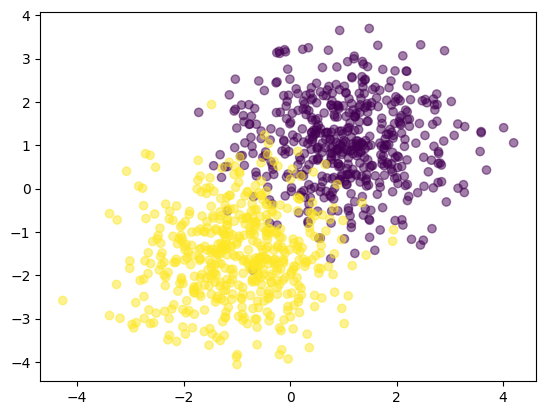

Training Accuracy"0.9480


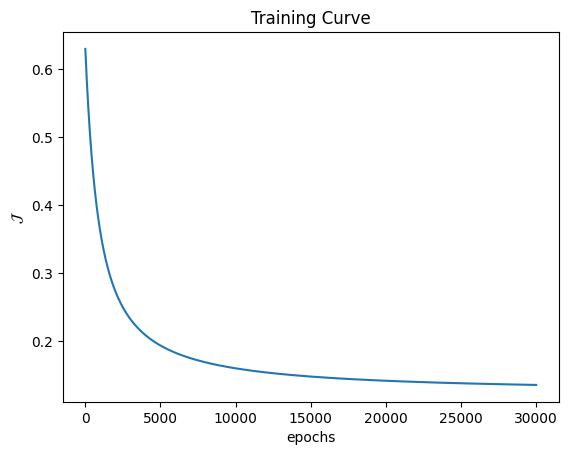

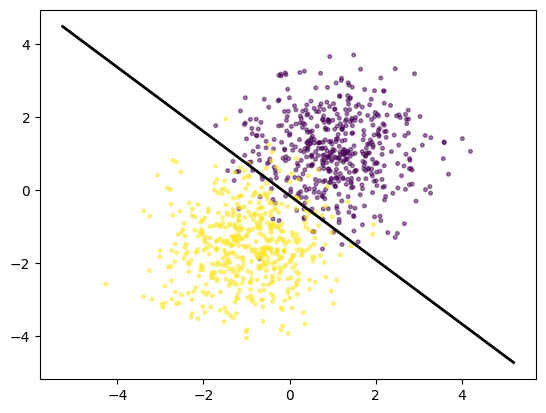

In [7]:
if __name__ =="__main__":
    main()

In [8]:
# Multi-Class Logistic Regression with Gradient Descent

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [10]:
## Useful FUnctions

In [11]:
def softMax(H):
    return (np.exp(H.T)/np.sum(np.exp(H),axis=1)).T

def cat_cross_entropy(Y,P_hat):
    return -(1/len(Y))*np.sum(np.sum(Y*np.log(P_hat),axis=1),axis=0)

def indices_to_one_hot(data,nb_classes):
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

def accuracy(y,y_hat):
    return np.mean(y==y_hat)

In [12]:
df = pd.read_csv("TripGaussKNN.csv",index_col=0)
X_df = df.iloc[:,0:2]
y_df = df.iloc[:,2]

In [13]:
X = X_df.to_numpy()
y = y_df.to_numpy()

In [14]:
## MV Logistic 

In [15]:
class MVLogisticRegression():

    def fit(self, X, y, eta=1e-3, epochs=1e3, show_curve=True):
        epochs = int(epochs)
        N, D = X.shape

        K = len(np.unique(y))
        Y = indices_to_one_hot(y,K).astype(int)
        #initialize weights and biases
        self.W = np.random.randn(D, K)
        self.B = np.random.randn(K)
        # Loss Container
        J = np.zeros(epochs)
        #Gradient Descent
        for epoch in range(epochs):
            P_hat = self.__forward__(X)
            J[epoch] = cat_cross_entropy(Y,P_hat)
            # Weight and Bias Updates
            self.W -= eta*(1/N)*X.T@(P_hat-Y)
            self.B -= eta*(1/N)*np.sum(P_hat-Y, axis=0)
            
        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel(r"$\mathcal{J}$")
            plt.title("Training Curve")
   
    def __forward__(self, X):
        return softMax(X@self.W + self.B)
    
    def predict(self, X):
        return np.argmax(self.__forward__(X), axis=1)
    

In [16]:
mv_logreg = MVLogisticRegression()

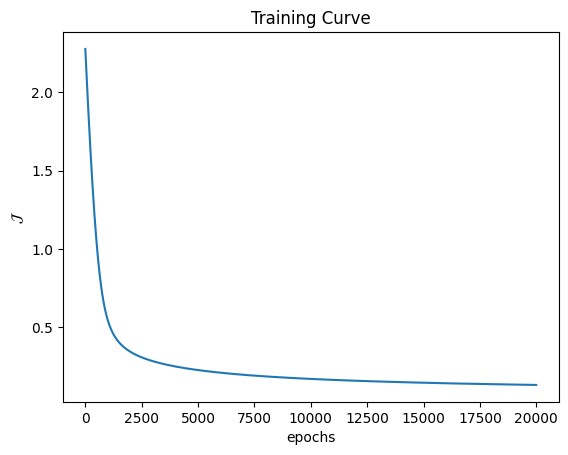

In [17]:
mv_logreg.fit(X, y, eta=1e-3,epochs =2e4)

In [18]:
y_hat = mv_logreg.predict(X)


In [19]:
accuracy(y_hat,y)


np.float64(0.9576666666666667)

In [20]:
# Two Layer Perceptron (Feed-Forward Neural Network)

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [22]:
## Activation Function

In [23]:
def linear(H):
    return H

def Sigmoid(H):
    return 1/(1+np.exp(-H))

def ReLU(H):
    return H*(H>0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis=1, keepdims=True)




In [24]:
##Useful Functions

In [25]:
def one_hot_encode(y):
    N=len(y)
    K=len(set(y))
    Y = np.zeros((N,K))
    for i in range(N):
        Y[i,y[i]]=1
    return Y

def cross_entropy(Y,P_hat):
    return -np.sum(Y*np.log(P_hat))

def accuracy(y, y_hat):
    return np.mean(y==y_hat)

In [26]:
y_test = np.array([0,1,2,0,0,2,1])
one_hot_encode(y_test)

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

## Shallow ANN Class

In [27]:
class Shallow_ANN():
    def fit(self,X,y,neurons=6,eta=1e-3,epochs=1e3,show_curve=True):
        epochs =int(epochs)
        N,D=X.shape
        Y=one_hot_encode(y)
        K=Y.shape[1]

        #Initialize Weights and Biases
        self.W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons],[neurons,K]),1)}
        self.B={l:np.random.randn(M) for l, M in enumerate([neurons,K],1)}
        #Define Activations
        self.a = {1:np.tanh,2:softmax}
        #Loss Container
        J=np.zeros(epochs)
        #Gradient Descent Progression
        for epoch in range(epochs):
            self.__forward__(X)
            J[epoch]=cross_entropy(Y,self.Z[2])
            #Weight Update Rules For Layer 2
            self.W[2] -= eta*(1/N)*self.Z[1].T@(self.Z[2]-Y)
            self.B[2] -= eta*(1/N)*(self.Z[2]-Y).sum(axis=0)
            # Weight Update Rules for Layer 1
            self.W[1] -= eta*(1/N)*X.T@((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2))
            self.B[1] -= eta*(1/N)*((self.Z[2]-Y)@self.W[2].T*(1-self.Z[1]**2)).sum(axis=0)

        if show_curve:
            plt.figure()
            plt.plot(J)
            plt.xlabel("epochs")
            plt.ylabel(r"$\mathcal{J}$")
            plt.title("Training Curve")

    def __forward__(self, X):
        self.Z = {0: X}
        for l in sorted(self.W.keys()):
            self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

    def predict(self,X):
        self.__forward__(X)
        return self.Z[2].argmax(axis=1)

                


In [28]:
#D = 2
#neurons = 6
#K = 3

#W = {l: np.random.randn(M[0],M[1]) for l,M in enumerate(zip([D,neurons],[neurons,K]),1)}


In [29]:
#W


In [30]:
# Implementation of Shallow ANN class

In [31]:
 
def main():
  D =2
  K = 3
  N= int(K*1e3)
  X0= np.random.randn((N//K),D) + np.array([2,2])
  X1= np.random.randn((N//K),D) + np.array([0,-2])
  X2= np.random.randn((N//K),D) + np.array([-2,2])
  X=np.vstack((X0,X1,X2))
  y=np.array([0]*(N//K)+ [1]*(N//K)+ [2]*(N//K))
  plt.figure()
  plt.scatter(X[:,0],X[:,1], c=y , s= 5)
  my_ann = Shallow_ANN()
  my_ann.fit(X, y, neurons= 3, eta=1e-2, epochs = 1e4, show_curve= True )
  y_hat =my_ann.predict(X)
  print("Accuracy: ", accuracy(y, y_hat))
  print(my_ann.W)
  print(my_ann.B)
  plt.figure()
  plt.scatter(X[:,0],X[:,1], c=y_hat , s= 5)
 

Accuracy:  0.9756666666666667
{1: array([[-0.9988645 , -1.04023557,  0.12841832],
       [-0.67405202,  0.40519325, -1.12753997]]), 2: array([[-1.65941458,  1.95123199,  1.10787494],
       [-1.35823392, -1.26387318,  1.67397765],
       [-1.29659022,  1.43479869, -2.68574387]])}
{1: array([ 1.15077092, -0.69660557, -0.00779531]), 2: array([-0.26176798, -0.60343216, -1.31050423])}


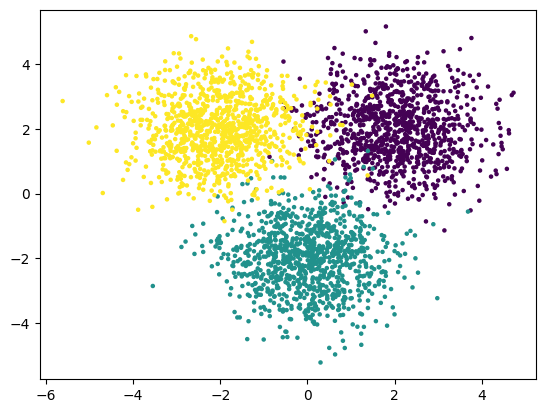

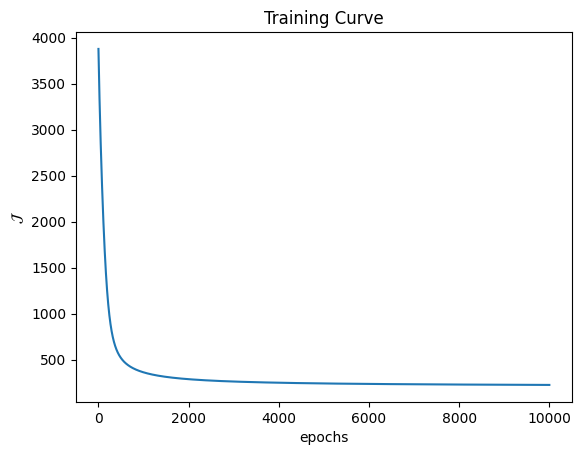

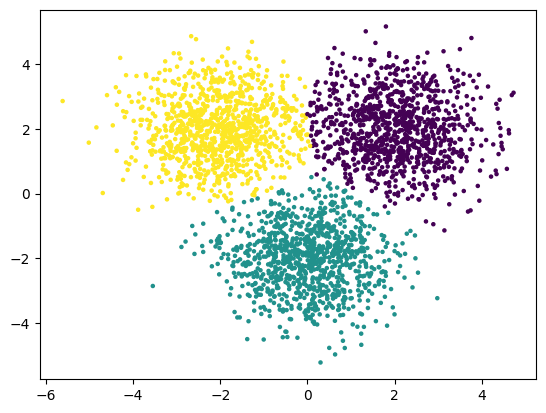

In [32]:
if __name__ =="__main__":
    main()

In [33]:
#Artificial Neural Net With Variable Architecture and Back Propagation

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [35]:
 
from matplotlib.colors import ListedColormap
cmap_bold = ListedColormap(["#FF0000","#00FF00","#0000FF"])
cmap_light = ListedColormap(["#FFBBBB","#BBFFBB","#BBBBFF"])
 

In [36]:
## Useful Functions 

In [37]:
#Activations 
def linear(H):
    return H

def sigmoid(H):
    return 1/(1+np.exp(-H))

def ReLU(H):
    return H*(H>0)

def softmax(H):
    eH = np.exp(H)
    return eH/eH.sum(axis=1, keepdims=True)

#Loss Functions
def cross_entropy(Y, P_hat):
    return -(1/len(Y))*np.sum(Y*np.log(P_hat))

def OLS(Y, Y_hat):
    return (1/(2*len(Y)))*np.sum((Y-Y_hat)**2)

#misc

def one_hot(y):
    N=len(y)
    K=len(set(y))
    Y = np.zeros((N,K))
    for i in range(N):
        Y[i,y[i]]=1
    return Y

def accuracy(y, y_hat):
    return np.mean(y==y_hat)

def R2(y, y_hat):
    return 1-np.sum((y-y_hat)**2)/np.sum((y-y.mean())**2)




In [38]:
## Derivatives of Activations

In [39]:
def derivative(Z,a):
    if a == linear:
        return 1
    elif a==sigmoid:
        return Z*(1-Z)
    
    elif a==np.tanh:
        return 1-Z**2
    
    elif a==ReLU:
        return (Z>0).astype(int)
    
    else: 
        ValueError("Uknown Activation, please add the derivativ here")

In [40]:
#ANN Class

In [41]:
# class ANN():

#     def __init__(self, architecture, activations =None, mode=0):
#         self.mode=mode
#         self.architecture = architecture
#         self.activations = activations
#         self.L = len(architecture) + 1

#     def fit(self, X, y, eta=1e-3, epochs = 1e3, show_curve = True):
#         epochs = int(epochs)
#         N, D = X.shape
#         if self.mode:
#             #regression node
#             Y=y
#             K=1
#             loss_func=OLS
#             out_act=linear

#         else: 
#             #classification mode
#             Y=one_hot(y)
#             K = Y.shape(1)
#             loss_func=cross_entropy
#             out_act=softmax

#         #Initialize Weights and Biases
#         self.W = {l: np.random.randn(M[0],M[1]) for l , M in enumerate(zip(([D]+self.architecture),(self.sarchitecture+[K])),1)}
#         self.B = {l: np.random.randn(M) for l, M in enumerate(self.architecture+[K],1)}
        
#         #Activation
#         if self.activations is None:
#             self.a = {l:ReLU for l in range(1, self.L)}
#         else:
#             self.a = {l: act for l, act in enumerate(self.activations, 1)}

        
#         self.a[self.L] = out_act



#         # Loss Container
#         J= np.zeros(epochs)

#         #Gragient Descent Progression
#         for epoch in range(epochs):
#             self.__forward__(X)
#             J[epoch] = loss_func(Y, self.Z[self.L])
#             dH = (1/N)*(self.Z[self.L]-Y)
#             for l in sorted(self.W.keys(), reverse = True):
                
#                 dW = self.Z[l-1].T@dH
#                 dB = dH.sum(axis=0)

#                 self.W[l] -= eta *dW
#                 self.B[l] -= eta *dB

#                 if l > 1:
#                     dZ = dH@self.W[l].T
#                     dH = dZ*derivative(self.Z[l-1],self.a[l-1])

#         if show_curve:
#             plt.figure()
#             plt.plot(J)
#             plt.xlabel("epochs")
#             plt.ylabel(r"$\mathcal{J}$")
#             plt.title("Training Curve")
                        
#     def __forward__(self,X):
#         self.Z = {0:X}
#         for l in sorted(self.W.keys()):
#             self.Z[l]=self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

#     def predict(self, X):
#         self.__forward__(X)
#         if self.mode:
#             return self.Z[self.L]
#         else:
#             return self.Z[self.L].argmax(axis=1)
        
 
class ANN():
  def __init__(self, architecture, activations=None, mode=0):
    self.mode=mode
    self.architecture=architecture
    self.activations = activations
    self.L = len(architecture)+1
  def fit (self, X, y, eta=1e-3, epochs=1e3, show_curve=True):
    epochs = int(epochs)
    if self.mode:
      Y=y
      K=1
    else:
      Y=one_hot(y)
      K=Y.shape[1]
    N, D = X.shape
    # Initialize Weights and Biases
    self.W = {l: np.random.randn(M[0],M[1]) for l, M in enumerate(zip(([D]+self.architecture), (self.architecture +[K])),1)}
    self.B = {l: np.random.randn(M) for l, M in enumerate(self.architecture+[K],1)}

    #Activations
    if self.activations is None:
      self.a= {l: ReLU for l in range(1, self.L)}
    else:
      self.a={l: act for l,act in enumerate(self.activations, 1)}
    #Output Activation Functions
    if self.mode:
      self.a[self.L]=linear
    else:
      self.a[self.L]=softmax
    J = np.zeros(epochs)
    #SGD Progression
    for epoch in range(epochs):
      self.__forward__(X)
      if self.mode:
        J[epoch]=OLS(Y, self.Z[self.L])
      else:
        J[epoch]=cross_entropy(Y, self.Z[self.L])
      dH = (1/N)*(self.Z[self.L]-Y)
      for l in sorted(self.W.keys(), reverse=True):
        dW = self.Z[l-1].T@dH
        dB = dH.sum(axis=0)
        self.W[l] -= eta*dW
        self.B[l] -= eta*dB
        if l>1:
          dZ =dH@self.W[l].T
          dH = dZ*derivative(self.Z[l-1], self.a[l-1])
    if show_curve:
      plt.figure()
      plt.plot(J)
      plt.xlabel("epochs")
      plt.ylabel("$\mathcal{J}$")
      plt.title("Training Curve")
  def __forward__(self,X):
    self.Z={0:X}
    for l in sorted(self.W.keys()):
      self.Z[l] = self.a[l](self.Z[l-1]@self.W[l]+self.B[l])

  def predict(self, X):
    self.__forward__(X)
    if self.mode:
      return self.Z[self.L]
    else:
      return self.Z[self.L].argmax(axis=1)
 
 



<>:131: SyntaxWarning: invalid escape sequence '\m'
<>:131: SyntaxWarning: invalid escape sequence '\m'
C:\Users\Rami Alrwais\AppData\Local\Temp\ipykernel_37348\3020362266.py:131: SyntaxWarning: invalid escape sequence '\m'
  plt.ylabel("$\mathcal{J}$")


In [42]:
 
def main_class():
    print('hi')
    D = 2
    K = 3
    N = int(K*1e3)
    X0 = np.random.randn((N//K),D) + np.array([2,2])
    X1 = np.random.randn((N//K),D) + np.array([0,-2])
    X2 = np.random.randn((N//K),D) + np.array([-2,2])
    X = np.vstack((X0,X1,X2))
    y = np.array([0]*(N//K) + [1]*(N//K) + [2]*(N//K))
    plt.figure()
    plt.scatter(X[:,0],X[:,1], c=y, s=6, alpha=0.6)

    my_ann_classifier = ANN(architecture=[6,5,4], activations=[np.tanh, ReLU, ReLU])
    my_ann_classifier.fit(X,y,eta=1e-2,epochs =1e4)

    y_hat=my_ann_classifier.predict(X)

    print(my_ann_classifier.W)
    print(my_ann_classifier.B)
    print(f"Training Accuracy: {accuracy(y_hat,y):0.4f}")
    x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
    x2 = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000)
    xx1, xx2 = np.meshgrid(x1, x2)
    Z = my_ann_classifier.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
    plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold,alpha=0.2)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.show()
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y_hat,s=6)

    x1 = np.linspace(X[:,0].min() - 1, X[:,0].max() + 1, 1000)
    x2 = np.linspace(X[:,1].min() - 1, X[:,1].max() + 1, 1000)
    xx1, xx2 = np.meshgrid(x1, x2)
    Z = my_ann_classifier.predict(np.c_[xx1.ravel(),xx2.ravel()]).reshape(*xx1.shape)
    plt.figure()
    plt.pcolormesh(xx1, xx2, Z, cmap = cmap_light)
    plt.scatter(X[:,0], X[:,1], c = y, cmap = cmap_bold,alpha=0.2)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    plt.show()
    plt.figure()
    plt.scatter(X[:,0],X[:,1],c=y_hat,s=6)
 

hi
{1: array([[-1.73337069,  0.3816841 , -0.50357769, -0.3602773 ,  1.67819109,
        -0.51363184],
       [-0.23824214, -1.0280363 , -1.79568523,  0.87400222, -0.00539616,
        -0.38664818]]), 2: array([[ 1.14111619, -0.36883076, -0.56684339, -0.66709265,  0.85243645],
       [-0.01365507, -1.43894548, -0.32943951,  0.72064367, -0.0128979 ],
       [ 0.18683843,  0.97841892, -0.43209388,  0.9764427 , -0.55580146],
       [-0.39355048, -0.51814477, -0.04093407, -0.41330951,  2.2990629 ],
       [ 0.95300659, -0.79731617,  1.62147431, -2.61219554, -0.85138305],
       [-2.22203293, -0.0391992 ,  0.0330667 ,  0.60117303, -0.69498365]]), 3: array([[ 0.80399782, -1.10567446, -1.13571699, -0.06354865],
       [-0.60015549, -0.2978469 , -0.94145738, -0.18512277],
       [ 1.33698419,  0.52264092,  1.4684543 ,  1.42441828],
       [-1.64120457,  1.09917974,  0.70927004,  0.5949424 ],
       [ 0.87793743, -0.41798058, -0.52833614,  2.48610879]]), 4: array([[ 0.78681524, -0.04903502, -0.44

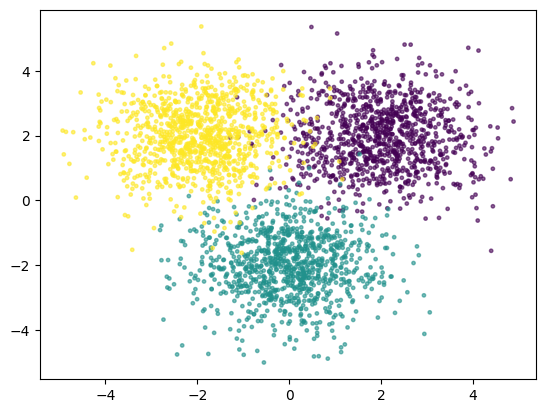

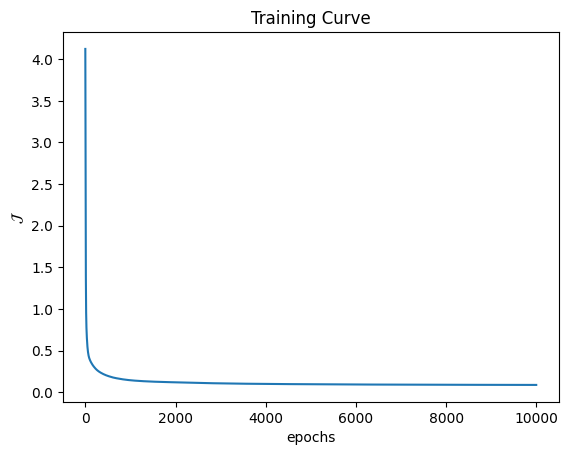

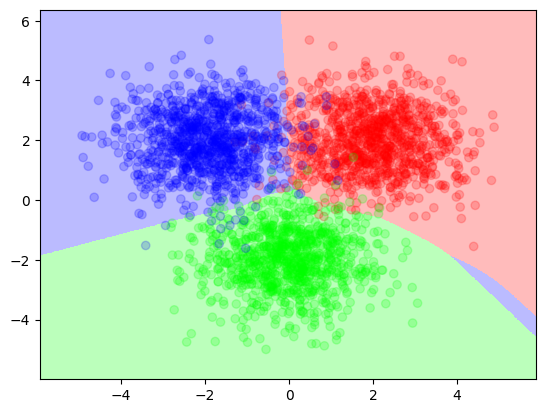

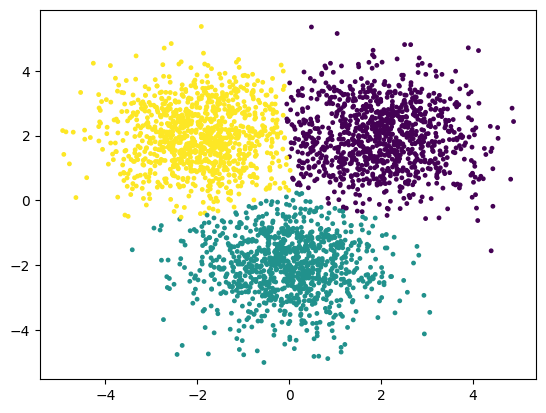

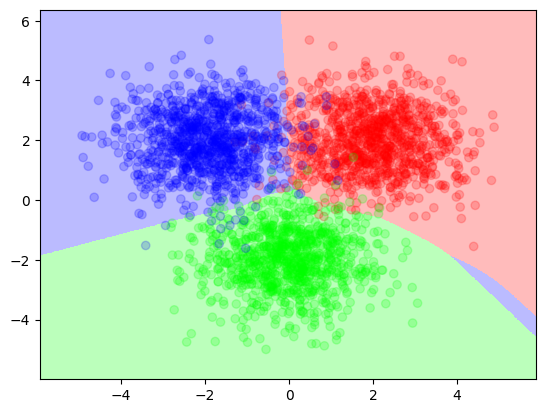

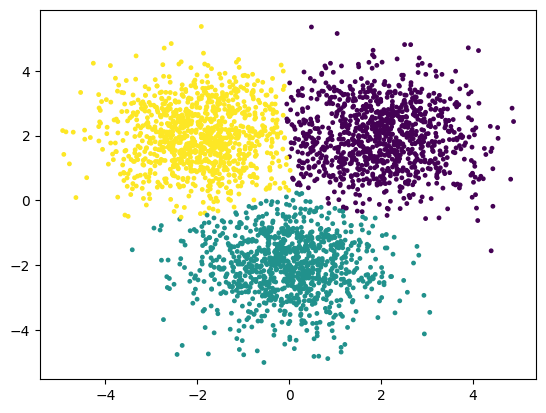

In [43]:
if __name__=="__main__":
    main_class()